# 🔌 Problem 1: Equivalent Resistance Using Graph Theory

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px;">
<h2 style="color: #2E86C1; text-align: center;">📐 Visualizing Circuit Simplification Step-by-Step</h2>
</div>

---

## 🎯 Motivation

Calculating equivalent resistance is a fundamental task in circuit analysis. While series and parallel rules work well for simple circuits, **graph theory** provides a powerful, automated way to analyze **complex resistor networks**.

A circuit is modeled as a graph:
- **Nodes** represent junctions
- **Edges** represent resistors (with weights equal to resistance)

---

## 🧠 Approach

We reduce the graph step by step using:

1. 🔗 **Series Reduction**  
   Two resistors in a chain become one with total resistance:  
   $$ R_{\text{eq}} = R_1 + R_2 $$

2. 🔁 **Parallel Reduction**  
   Two or more resistors between the same nodes:  
   $$ \frac{1}{R_{\text{eq}}} = \frac{1}{R_1} + \frac{1}{R_2} + \cdots $$

3. 🔄 Repeat until the entire network reduces to a single equivalent resistance.

---

## 🧮 Example Circuit

A simple 4-node graph with resistors:

- 2Ω between nodes (1)-(2)  
- 3Ω between nodes (2)-(3)  
- 4Ω between nodes (3)-(4)  
- 1Ω directly between nodes (1)-(4)

---

## ⚙️ Algorithm Pseudocode

```plaintext
while graph not reduced:
    if a node has exactly 2 neighbors:
        combine series resistors
    if parallel resistors exist:
        combine using reciprocal rule


Initial circuit graph:
Edge 1-2: 2.0Ω
Edge 1-4: 1.0Ω
Edge 2-3: 3.0Ω
Edge 3-4: 4.0Ω
Series reduction at node 2: 2.0Ω + 3.0Ω = 5.0Ω
Series reduction at node 3: 4.0Ω + 5.0Ω = 9.0Ω

Equivalent resistance between nodes 1 and 4: 9.0Ω


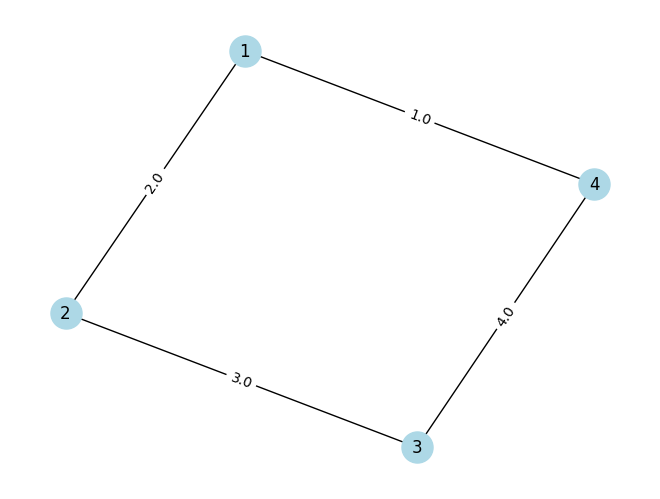

In [33]:
import networkx as nx
import matplotlib.pyplot as plt  # For visualization (optional)

def series_resistance(r1, r2):
    """Calculate equivalent resistance for resistors in series."""
    return r1 + r2

def parallel_resistance(resistances):
    """Calculate equivalent resistance for resistors in parallel."""
    if not resistances:
        return 0
    reciprocal_sum = sum(1/r for r in resistances if r != 0)
    return 1/reciprocal_sum if reciprocal_sum != 0 else 0

def find_parallel_edges(G, node1, node2):
    """Find all edges between node1 and node2 (for parallel resistors)."""
    edges = []
    for edge in G.edges(data=True):
        u, v, data = edge
        if (u == node1 and v == node2) or (u == node2 and v == node1):
            edges.append(data['resistance'])
    return edges

def reduce_graph(G, start_node, end_node):
    """Reduce the graph to find equivalent resistance between start_node and end_node."""
    G = G.copy()  # Work on a copy to preserve the original graph
    
    while len(G.nodes) > 2 or (len(G.nodes) == 2 and len(G.edges) > 1):
        # Step 1: Check for series reduction (node with exactly 2 neighbors)
        for node in list(G.nodes):
            if node in [start_node, end_node]:
                continue
            if G.degree(node) == 2:
                # Get the two neighbors and their resistances
                neighbors = list(G.neighbors(node))
                edge1 = G[node][neighbors[0]]
                edge2 = G[node][neighbors[1]]
                r1 = edge1['resistance']
                r2 = edge2['resistance']
                
                # Calculate series equivalent
                r_eq = series_resistance(r1, r2)
                
                # Remove the node and connect neighbors with equivalent resistance
                G.remove_node(node)
                G.add_edge(neighbors[0], neighbors[1], resistance=r_eq)
                print(f"Series reduction at node {node}: {r1}Ω + {r2}Ω = {r_eq}Ω")
                break
        else:
            # Step 2: Check for parallel reduction
            for node1 in G.nodes:
                for node2 in G.nodes:
                    if node1 >= node2:
                        continue
                    resistances = find_parallel_edges(G, node1, node2)
                    if len(resistances) > 1:
                        # Calculate parallel equivalent
                        r_eq = parallel_resistance(resistances)
                        
                        # Remove all edges between node1 and node2
                        G.remove_edges_from([(node1, node2), (node2, node1)])
                        # Add single edge with equivalent resistance
                        G.add_edge(node1, node2, resistance=r_eq)
                        print(f"Parallel reduction between {node1} and {node2}: {resistances}Ω = {r_eq}Ω")
                        break
                else:
                    continue
                break
            else:
                # No reductions possible
                print("No further reductions possible.")
                return None
    
    # Final equivalent resistance
    if G.has_edge(start_node, end_node):
        return G[start_node][end_node]['resistance']
    return None

def main():
    # Create a new graph
    G = nx.Graph()
    
    # Add edges with resistances (example circuit)
    G.add_edge(1, 2, resistance=2.0)  # 2Ω between nodes 1 and 2
    G.add_edge(2, 3, resistance=3.0)  # 3Ω between nodes 2 and 3
    G.add_edge(3, 4, resistance=4.0)  # 4Ω between nodes 3 and 4
    G.add_edge(1, 4, resistance=1.0)  # 1Ω between nodes 1 and 4
    
    # Define start and end nodes
    start_node = 1
    end_node = 4
    
    print("Initial circuit graph:")
    for edge in G.edges(data=True):
        print(f"Edge {edge[0]}-{edge[1]}: {edge[2]['resistance']}Ω")
    
    # Calculate equivalent resistance
    eq_resistance = reduce_graph(G, start_node, end_node)
    
    if eq_resistance is not None:
        print(f"\nEquivalent resistance between nodes {start_node} and {end_node}: {eq_resistance}Ω")
    else:
        print("\nCould not reduce graph to a single resistance.")
    
    # Optional: Visualize the initial graph (requires matplotlib)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)
    edge_labels = nx.get_edge_attributes(G, 'resistance')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()

if __name__ == "__main__":
    main()


--- Series Configuration Example ---
Before simplification:
o1–o2: 5 Ω
o2–o3: 3 Ω


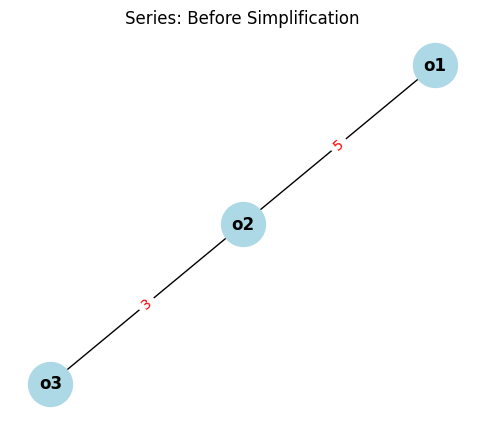

Series reduction: o1–o2–o3 → o1–o3 = 5 + 3 = 8 Ω
After simplification:
o1–o3: 8 Ω


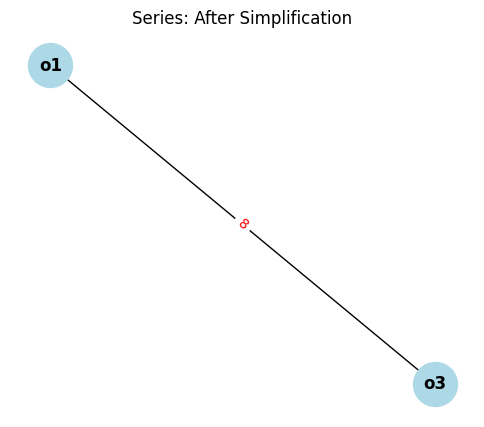


--- Parallel Configuration Example ---
Before simplification:
o1–o3 (key=0): 4 Ω
o1–o3 (key=1): 6 Ω


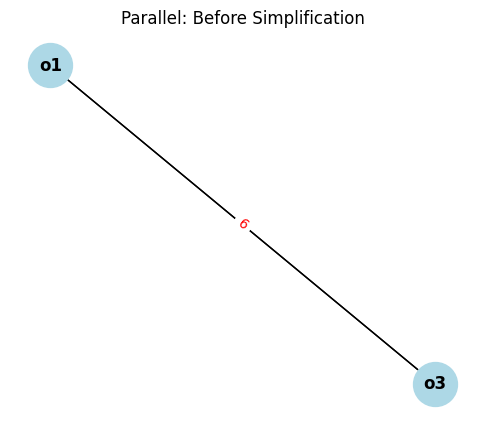

Parallel reduction: o1 ⇄ o3 → 1/4 + 1/6 = 1/2.40 Ω
After simplification:
o1–o3 (key=0): 2.4 Ω


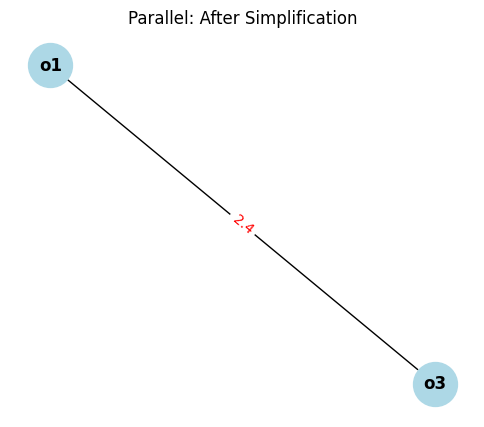


--- Mixed Configuration Example ---
Initial mixed circuit:
1–2: 2 Ω
2–3: 3 Ω
2–4: 6 Ω
3–4: 6 Ω
4–5: 1 Ω


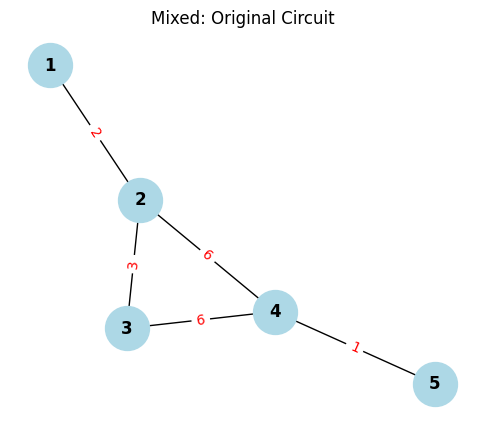


Step 1: Parallel between 2–4 and 3–4 → Req = 3Ω


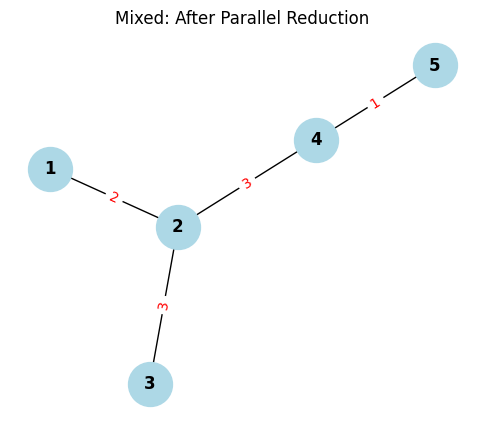

Step 2: Series → 2–3 (3Ω) + 2–4 (3Ω) = 6Ω


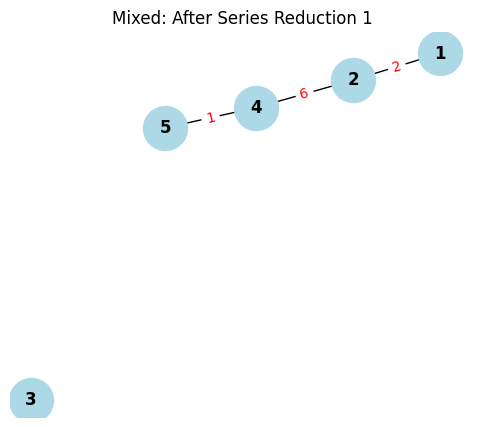

Step 3: Series → 1–2 + 2–4 + 4–5 = 2 + 6 + 1 = 9Ω


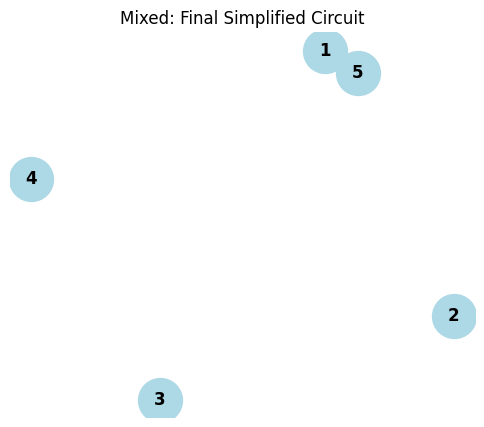


Final equivalent resistance between 1 and 5 = 9 Ω


In [38]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(G, title):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(6, 5))
    plt.title(title)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'resistance')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
    plt.show()

# --- Series Example ---
G_series = nx.Graph()
G_series.add_edge('o1', 'o2', resistance=5)
G_series.add_edge('o2', 'o3', resistance=3)

print("\n--- Series Configuration Example ---")
print("Before simplification:")
for u, v, d in G_series.edges(data=True):
    print(f"{u}–{v}: {d['resistance']} Ω")
draw_graph(G_series, "Series: Before Simplification")

# Simplify: o1–o2–o3 → o1–o3
G_series.remove_node('o2')
G_series.add_edge('o1', 'o3', resistance=8)
print("Series reduction: o1–o2–o3 → o1–o3 = 5 + 3 = 8 Ω")
print("After simplification:")
for u, v, d in G_series.edges(data=True):
    print(f"{u}–{v}: {d['resistance']} Ω")
draw_graph(G_series, "Series: After Simplification")

# --- Parallel Example ---
G_parallel = nx.MultiGraph()
G_parallel.add_edge('o1', 'o3', resistance=4)
G_parallel.add_edge('o1', 'o3', resistance=6)

print("\n--- Parallel Configuration Example ---")
print("Before simplification:")
for u, v, key, d in G_parallel.edges(keys=True, data=True):
    print(f"{u}–{v} (key={key}): {d['resistance']} Ω")
draw_graph(G_parallel, "Parallel: Before Simplification")

# Simplify: o1 ⇄ o3 → Req = 1 / (1/4 + 1/6)
edges = list(G_parallel.get_edge_data('o1', 'o3').items())
R1 = edges[0][1]['resistance']
R2 = edges[1][1]['resistance']
R_eq = (R1 * R2) / (R1 + R2)
G_parallel.remove_edge('o1', 'o3', key=edges[0][0])
G_parallel.remove_edge('o1', 'o3', key=edges[1][0])
G_parallel.add_edge('o1', 'o3', resistance=R_eq)

print(f"Parallel reduction: o1 ⇄ o3 → 1/{R1} + 1/{R2} = 1/{R_eq:.2f} Ω")
print("After simplification:")
for u, v, key, d in G_parallel.edges(keys=True, data=True):
    print(f"{u}–{v} (key={key}): {d['resistance']} Ω")
draw_graph(G_parallel, "Parallel: After Simplification")

# --- Mixed Circuit Example ---
G_mixed = nx.Graph()
G_mixed.add_edge(1, 2, resistance=2)
G_mixed.add_edge(2, 3, resistance=3)
G_mixed.add_edge(2, 4, resistance=6)
G_mixed.add_edge(3, 4, resistance=6)
G_mixed.add_edge(4, 5, resistance=1)

print("\n--- Mixed Configuration Example ---")
print("Initial mixed circuit:")
for u, v, d in G_mixed.edges(data=True):
    print(f"{u}–{v}: {d['resistance']} Ω")
draw_graph(G_mixed, "Mixed: Original Circuit")

# Step 1: Parallel → 2–4 and 3–4
print("\nStep 1: Parallel between 2–4 and 3–4 → Req = 3Ω")
G_mixed.remove_edge(2, 4)
G_mixed.remove_edge(3, 4)
G_mixed.add_edge(2, 4, resistance=3)
draw_graph(G_mixed, "Mixed: After Parallel Reduction")

# Step 2: Series → 2–3 and 2–4 → combine to 2–4
print("Step 2: Series → 2–3 (3Ω) + 2–4 (3Ω) = 6Ω")
G_mixed.remove_edge(2, 3)
G_mixed.remove_edge(2, 4)
G_mixed.add_edge(2, 4, resistance=6)
draw_graph(G_mixed, "Mixed: After Series Reduction 1")

# Step 3: Combine full path → 1–2–4–5 = 2 + 6 + 1 = 9Ω
print("Step 3: Series → 1–2 + 2–4 + 4–5 = 2 + 6 + 1 = 9Ω")
G_mixed.remove_edge(1, 2)
G_mixed.remove_edge(2, 4)
G_mixed.remove_edge(4, 5)
G_mixed.add_edge(1, 5, resistance=9)
draw_graph(G_mixed, "Mixed: Final Simplified Circuit")

print("\nFinal equivalent resistance between 1 and 5 = 9 Ω")
